# MACHINE LEARNING 
* Supervised Learning 

In [2]:
import pandas as pd 
import pycaret.classification as pc
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, classification_report
import shap
import matplotlib.pyplot as plt


In [71]:
# Cargamos los datos 
data=pd.read_csv(r'..\data\train_set.csv')
data=data.iloc[:,1:]

# Comparacion de 15 modelos de IA

In [72]:
data.columns

Index(['duration', 'start_time', 'end_time', 'start_lat', 'start_lon',
       'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'start_station', 'end_station'],
      dtype='object')

In [73]:
data.dropna(inplace=True)

In [74]:
data=data[['start_station',
 'end_lon',
 'end_station',
 'start_time',
 'duration',
 'start_lat',
 'trip_route_category',
 'bike_id',
 'end_time',
 'end_lat',
 'start_lon','passholder_type']]

In [75]:
# Configurar el entorno de PyCaret
exp = pc.setup(data, 
               target='passholder_type', 
               remove_multicollinearity=True, 
               multicollinearity_threshold=0.95,
               #use_gpu=True,  
               session_id=123)

# Comparar modelos y seleccionar el mejor
mejor_modelo = pc.compare_models()

,Description,Value
0,Session id,123
1,Target,passholder_type
2,Target type,Multiclass
3,Target mapping,"Annual Pass: 0, Flex Pass: 1, Monthly Pass: 2, One Day Pass: 3, Testing: 4, Walk-up: 5"
4,Original data shape,"(675626, 12)"
5,Transformed data shape,"(675626, 10)"
6,Transformed train set shape,"(472938, 10)"
7,Transformed test set shape,"(202688, 10)"
8,Numeric features,7
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6762,0.7678,0.6762,0.6486,0.6497,0.3802,0.3921,2.4630
lr,Logistic Regression,0.6589,0.0000,0.6589,0.5963,0.5897,0.2765,0.3288,14.5700
ridge,Ridge Classifier,0.6087,0.0000,0.6087,0.5350,0.5381,0.1673,0.2012,1.7950
dummy,Dummy Classifier,0.5734,0.5000,0.5734,0.3288,0.4180,0.0000,0.0000,1.8050
lda,Linear Discriminant Analysis,0.5325,0.0000,0.5325,0.5901,0.5268,0.2085,0.2213,1.8410
svm,SVM - Linear Kernel,0.5064,0.0000,0.5064,0.5330,0.4294,0.1522,0.1797,29.5210
nb,Naive Bayes,0.4934,0.6532,0.4934,0.5457,0.4926,0.1456,0.1524,1.8040
dt,Decision Tree Classifier,0.4029,0.5720,0.4029,0.5369,0.4419,0.1245,0.1351,2.0040
qda,Quadratic Discriminant Analysis,0.3594,0.0000,0.3594,0.5247,0.4106,0.0794,0.0887,1.8280
rf,Random Forest Classifier,0.3278,0.6568,0.3278,0.5741,0.3867,0.1095,0.1393,9.8000


In [76]:
# Crear un pipeline con el mejor modelo
mejor_pipeline = pc.create_model(mejor_modelo)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6756,0.7688,0.6756,0.6488,0.6494,0.3792,0.3911
1,0.6765,0.7695,0.6765,0.6487,0.6499,0.3806,0.3927
2,0.6753,0.7680,0.6753,0.6474,0.6488,0.3785,0.3901
3,0.6764,0.7661,0.6764,0.6491,0.6499,0.3801,0.3922
4,0.6774,0.7683,0.6774,0.6491,0.6507,0.3824,0.3942
5,0.6756,0.7678,0.6756,0.6480,0.6498,0.3807,0.3921
6,0.6779,0.7684,0.6779,0.6505,0.6511,0.3827,0.3951
7,0.6753,0.7660,0.6753,0.6478,0.6495,0.3796,0.3910
8,0.6773,0.7693,0.6773,0.6495,0.6509,0.3825,0.3945


In [77]:
# Optimizar los hiperparámetros del mejor modelo
modelo_optimizado = pc.tune_model(mejor_pipeline)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7018,0.8171,0.7018,0.6771,0.6638,0.4124,0.4306
1,0.7029,0.8172,0.7029,0.6774,0.6650,0.4149,0.4328
2,0.7022,0.8144,0.7022,0.6778,0.6646,0.4138,0.4313
3,0.7020,0.8150,0.7020,0.6768,0.6636,0.4122,0.4306
4,0.7030,0.8143,0.7030,0.6756,0.6644,0.4149,0.4329
5,0.7025,0.8178,0.7025,0.6750,0.6641,0.4142,0.4319
6,0.7046,0.8164,0.7046,0.6807,0.6659,0.4169,0.4359
7,0.7009,0.8131,0.7009,0.6744,0.6633,0.4115,0.4290
8,0.7041,0.8177,0.7041,0.6812,0.6661,0.4165,0.4352


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [78]:
# Finalizar el modelo, lo que incluye el pipeline completo
modelo_final = pc.finalize_model(modelo_optimizado)

# Guardar el modelo final
pc.save_model(modelo_final, r'C:\Users\jacj2\OneDrive\Desktop\prueba_tecnica_Arkon\model')

# Cargar el modelo guardado
modelo_cargado = pc.load_model(r'C:\Users\jacj2\OneDrive\Desktop\prueba_tecnica_Arkon\model')

# Predecir con el modelo cargado
predicciones = pc.predict_model(modelo_cargado)

print(predicciones)


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7883,0.9021,0.7883,0.7975,0.7650,0.5894,0.6126


        start_station     end_lon  end_station           start_time  duration  \
407759           3063 -118.256668         3006       1/7/2021 11:14         4   
239765           3019 -118.262733         3008      11/4/2020 12:25        15   
528517           4311 -118.292183         4306  2019-02-18 12:08:00        64   
101440           4482 -118.331009         4482       4/1/2020 18:48        47   
79758            4214 -118.481552         4214       6/5/2021 17:56        89   
...               ...         ...          ...                  ...       ...   
307946           3031 -118.233170         3058  2018-08-30 15:26:00        15   
554200           3018 -118.260139         3018      8/28/2017 18:04        14   
292490           3062 -118.258537         3005  2019-12-02 18:43:28        30   
624127           3030 -118.237213         3014  2018-12-06 17:39:00         5   
92276            3046 -118.260139         3018  2019-10-24 09:03:05        20   

        start_lat trip_rout

# Explicamos el modelo

In [79]:
#pc.plot_model(modelo_cargado,plot='feature')

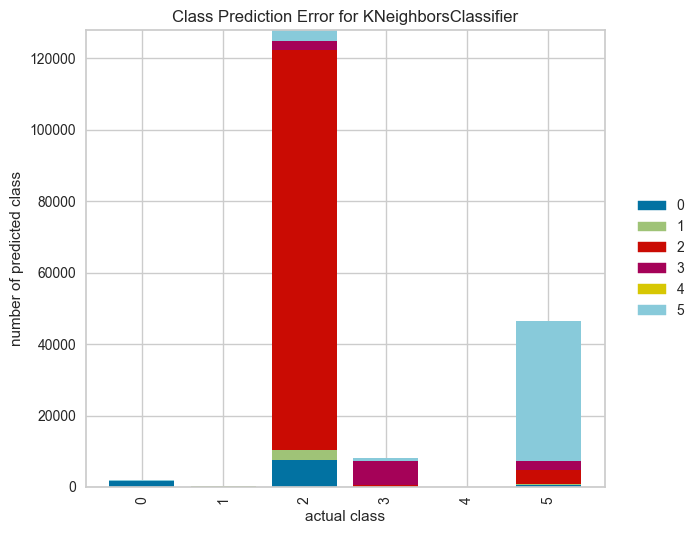

In [80]:
pc.plot_model(modelo_cargado,plot='error')

In [81]:
pc.evaluate_model(modelo_cargado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
modelo_cargado.named_steps

{'label_encoding': TransformerWrapperWithInverse(exclude=None, include=None,
                               transformer=LabelEncoder()),
 'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['start_station', 'end_lon', 'end_station',
                             'duration', 'start_lat', 'end_lat', 'start_lon'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              keep_empty_features=False,
                                              missing_values=nan,
                                              strategy='mean')),
 'categorical_imputer': TransformerWrapper(exclude=None,
                    include=['start_time', 'trip_route_category', 'bike_id',
                             'end_time'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=N

# BONUS 
* Explicabilidad de los modelos 
con la finalidad de explicar el modelo y como aprendio se muestra sap para validar los distintos 

In [83]:
from pycaret.classification import *
mejor_modelo = pc.compare_models()
xgboost_model = create_model('xgboost')
interpret_model(xgboost_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:11:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Creamos las predicciones 

In [3]:
test=pd.read_csv(r"../data/test_set.csv")

In [4]:
from pycaret.classification import load_model, predict_model
import pandas as pd

# Ruta al modelo
ruta = r"C:\Users\jacj2\OneDrive\Desktop\prueba_tecnica_Arkon\model"

# Cargar el modelo
try:
    modelo = load_model(ruta)
    print("Modelo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el modelo: {e}")


Transformation Pipeline and Model Successfully Loaded
Modelo cargado exitosamente.


In [6]:
test.drop(columns=['trip_id'])

,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,12,1/1/2017 0:24,1/1/2017 0:36,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
1,17,1/1/2017 0:28,1/1/2017 0:45,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018
2,20,1/1/2017 0:39,1/1/2017 0:59,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055
3,12,1/1/2017 0:43,1/1/2017 0:55,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079
4,48,1/1/2017 0:56,1/1/2017 1:44,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063
...,...,...,...,...,...,...,...,...,...,...,...
569881,19,12/31/2021 23:29,12/31/2021 23:48,34.040989,-118.255798,34.041130,-118.267982,14027,One Way,3033,3011
569882,8,12/31/2021 23:40,12/31/2021 23:48,34.044701,-118.252441,34.051941,-118.243530,20006,One Way,3031,3030
569883,43,12/31/2021 23:47,1/1/2022 0:30,34.044701,-118.252441,34.044701,-118.252441,16214,Round Trip,3031,3031
569884,42,12/31/2021 23:48,1/1/2022 0:30,34.044701,-118.252441,34.044701,-118.252441,13336,Round Trip,3031,3031


In [7]:
ypred=modelo.predict(test.drop(columns=['trip_id']))

In [8]:
ypred

0         Monthly Pass
1         Monthly Pass
2         Monthly Pass
3         Monthly Pass
4              Walk-up
              ...     
569881         Walk-up
569882    Monthly Pass
569883         Walk-up
569884         Walk-up
569885         Walk-up
Name: passholder_type, Length: 569886, dtype: object

In [10]:
pd.DataFrame({"trip_id":test["trip_id"],"passholder_type":ypred}).to_csv("../data/sample_submission.csv",index=False)